## CM1-LOFS supercell visualization

This notebook loads and plots a CM1 simulation with LOFS netcdf output.


This notebook requires the latest code on the master branch of the yt source code, so to run this notebook you'll need to download and install from source (see [here](https://yt-project.org/doc/installing.html#installing-yt-from-source)). 

This notebook uses a high resolution CM1 simulation available here: ???? 

In [1]:
import yt

In [2]:
ds = yt.load('cm1_tornado_lofs/budget-test.04400.000000.nc')

yt : [INFO     ] 2020-11-18 11:53:26,827 Parameters: current_time              = 4400.0
yt : [INFO     ] 2020-11-18 11:53:26,827 Parameters: domain_dimensions         = [1198 1230  198]
yt : [INFO     ] 2020-11-18 11:53:26,827 Parameters: domain_left_edge          = [-5.98499985e+01 -6.14500008e+01  5.00000007e-02]
yt : [INFO     ] 2020-11-18 11:53:26,828 Parameters: domain_right_edge         = [59.84999847 61.45000076 19.75      ]
yt : [INFO     ] 2020-11-18 11:53:26,828 Parameters: cosmological_simulation   = 0


We can check the fields:

In [3]:
ds.field_list

[('cm1', 'dbz'), ('cm1', 'prespert'), ('cm1', 'thrhopert'), ('cm1', 'zvort')]

and pull out values from regions: 

In [4]:
ad = ds.all_data() 
dbz = ad['dbz']
print(dbz.shape)
print(dbz[0:1000:50])

(291760920,)
[-35.21875  -35.21875  -19.328125 -35.21875  -35.21875  -35.21875
 -19.390625 -35.21875  -35.21875  -35.21875  -19.359375 -35.21875
 -35.21875  -35.21875  -19.296875 -35.21875  -35.21875  -35.21875
 -19.25     -35.21875 ] dB


or find some derived quantities like the min/max values for a field:

In [5]:
ad.quantities.extrema('dbz')

unyt_array([-55.81005859,  68.84814453], 'dB')

In [6]:
ad.quantities.extrema('zvort')

unyt_array([-0.4729321 ,  0.55976564], '1/s')

## Slice Plots 

Let's move on to some plotting. First let's slice the pressure perturbation:

yt : [INFO     ] 2020-11-18 11:53:38,912 xlim = -61.450001 61.450001
yt : [INFO     ] 2020-11-18 11:53:38,913 ylim = 0.050000 19.750000
yt : [INFO     ] 2020-11-18 11:53:38,914 xlim = -61.450001 61.450001
yt : [INFO     ] 2020-11-18 11:53:38,914 ylim = 0.050000 19.750000
yt : [INFO     ] 2020-11-18 11:53:38,915 Making a fixed resolution buffer of (('cm1', 'prespert')) 800 by 800
yt : [WARNING  ] 2020-11-18 11:53:39,388 Plot image for field ('cm1', 'prespert') has both positive and negative values. Min = -8.905464, Max = 2.572888.
yt : [WARNING  ] 2020-11-18 11:53:39,389 Switching to symlog colorbar scaling unless linear scaling is specified later



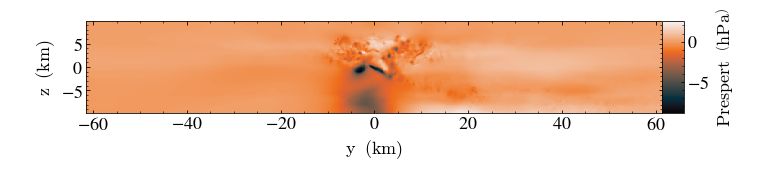

In [7]:
slc = yt.SlicePlot(ds,'x','prespert')
slc.set_log('prespert',False)
slc.set_cmap('prespert', 'dusk')

and now reflectivity, which shows some detailed structure:

yt : [INFO     ] 2020-11-18 11:53:40,469 xlim = -61.450001 61.450001
yt : [INFO     ] 2020-11-18 11:53:40,469 ylim = 0.050000 19.750000
yt : [INFO     ] 2020-11-18 11:53:40,470 xlim = -61.450001 61.450001
yt : [INFO     ] 2020-11-18 11:53:40,470 ylim = 0.050000 19.750000
yt : [INFO     ] 2020-11-18 11:53:40,471 Making a fixed resolution buffer of (('cm1', 'dbz')) 800 by 800
yt : [WARNING  ] 2020-11-18 11:53:40,937 Plot image for field ('cm1', 'dbz') has both positive and negative values. Min = -37.452676, Max = 64.368267.
yt : [WARNING  ] 2020-11-18 11:53:40,937 Switching to symlog colorbar scaling unless linear scaling is specified later



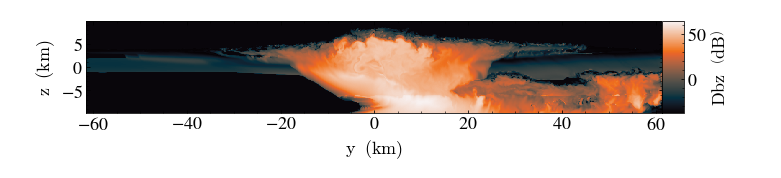

In [8]:
slc = yt.SlicePlot(ds,'x','dbz')
slc.set_log('dbz',False)
slc.set_cmap('dbz', 'dusk')

which we can save with 

In [9]:
slc.save('./figures/cm1_slice_dbz_full.png')

yt : [INFO     ] 2020-11-18 11:53:41,232 Saving plot ./figures/cm1_slice_dbz_full.png


['./figures/cm1_slice_dbz_full.png']

let's create a slice with a smaller width to pull out some of that detail:

yt : [INFO     ] 2020-11-18 11:53:41,976 xlim = -12.500000 12.500000
yt : [INFO     ] 2020-11-18 11:53:41,977 ylim = -2.600000 22.400000
yt : [INFO     ] 2020-11-18 11:53:41,977 xlim = -12.500000 12.500000
yt : [INFO     ] 2020-11-18 11:53:41,978 ylim = -2.600000 22.400000
yt : [INFO     ] 2020-11-18 11:53:41,978 Making a fixed resolution buffer of (('cm1', 'dbz')) 800 by 800
yt : [WARNING  ] 2020-11-18 11:53:42,433 Plot image for field ('cm1', 'dbz') has both positive and negative values. Min = -37.188965, Max = 64.375000.
yt : [WARNING  ] 2020-11-18 11:53:42,434 Switching to symlog colorbar scaling unless linear scaling is specified later



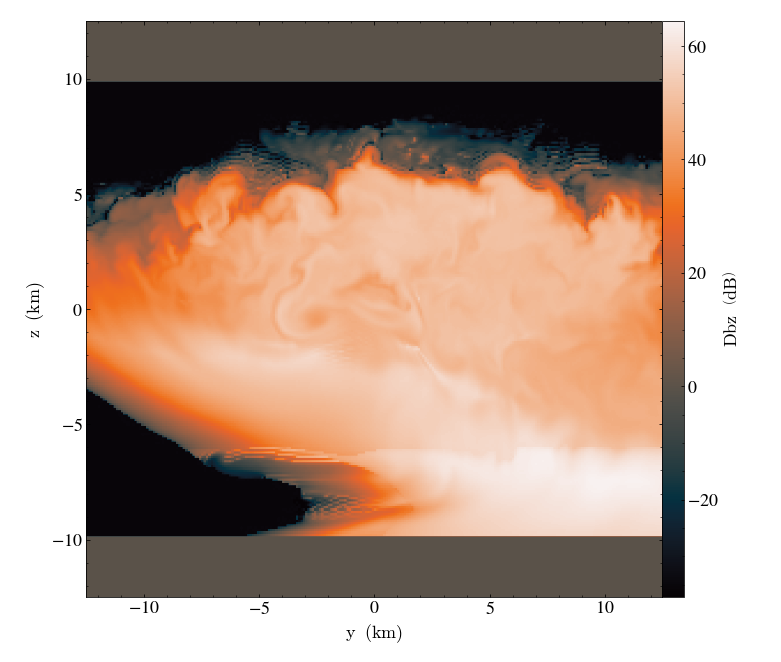

In [10]:
slc = yt.SlicePlot(ds,'x','dbz',width = (25,'km'))
slc.set_log('dbz',False)
slc.set_cmap('dbz', 'dusk')

In [11]:
slc.save('./figures/cm1_slice_dbz_50km.png')

yt : [INFO     ] 2020-11-18 11:53:42,781 Saving plot ./figures/cm1_slice_dbz_50km.png


['./figures/cm1_slice_dbz_50km.png']

and zoom in a couple of times:

yt : [INFO     ] 2020-11-18 11:53:42,970 Making a fixed resolution buffer of (('cm1', 'dbz')) 800 by 800



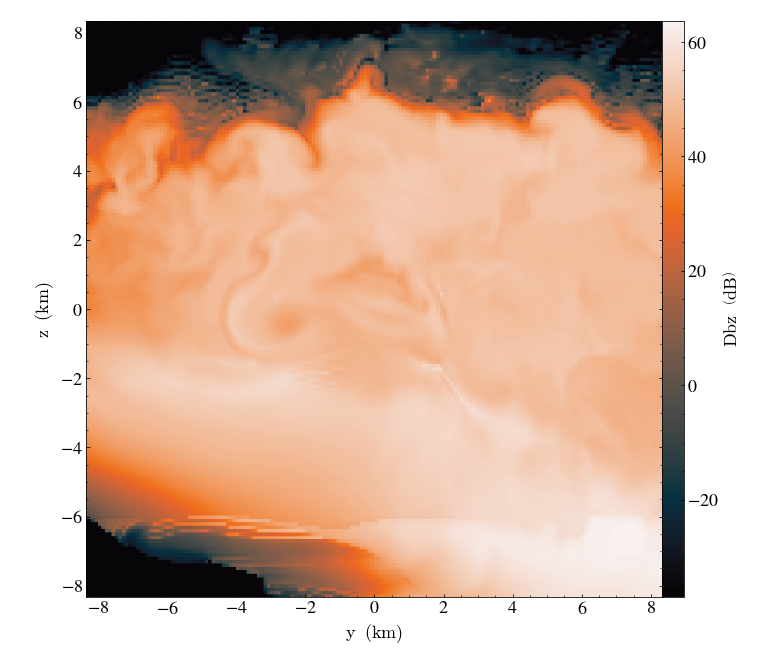


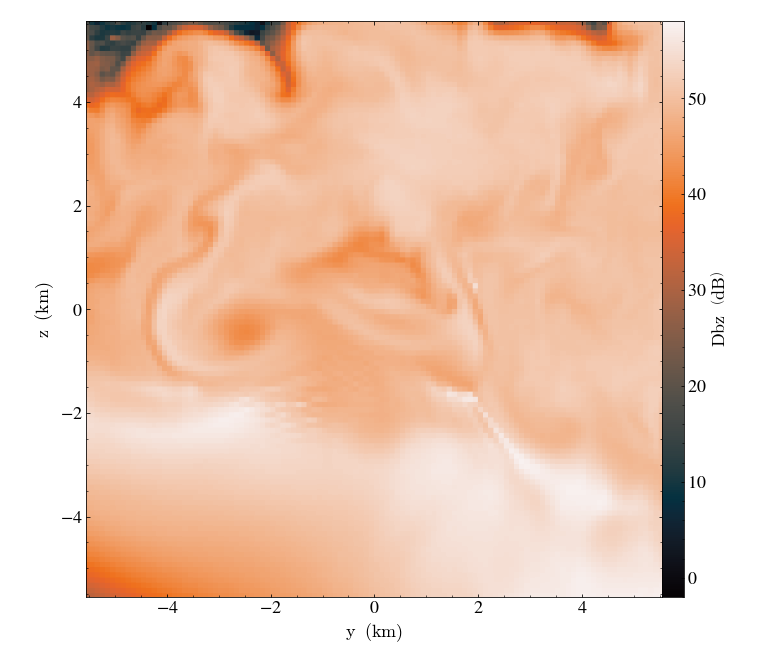

In [12]:
for i in range(2):
    slc.zoom(1.5)
    slc.show()

## Phase Plots

yt : [WARNING  ] 2020-11-18 11:53:48,028 Profiled field ('cm1', 'prespert') has no positive values.  Max = 0.000000.
yt : [WARNING  ] 2020-11-18 11:53:48,028 Switching to linear colorbar scaling.



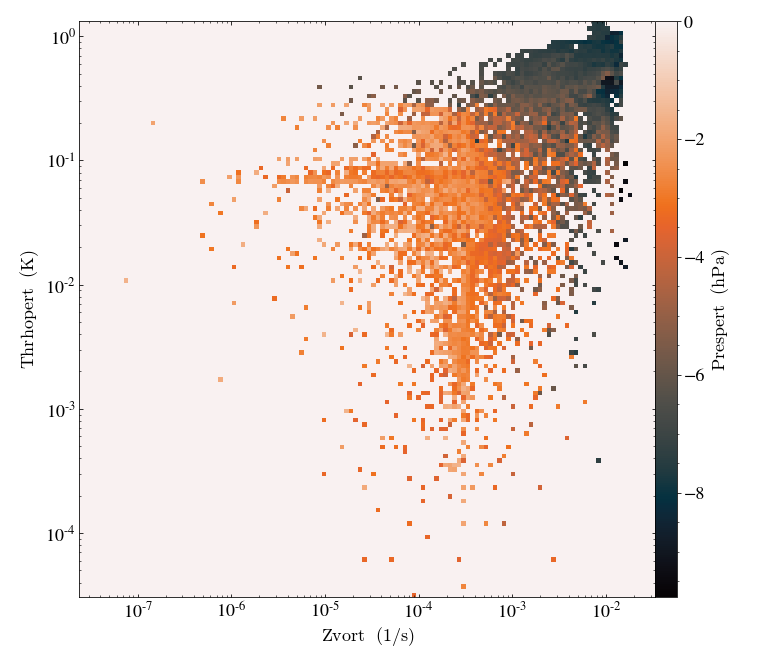

In [13]:
sp = ds.sphere([0, 0, 0], (3, "km"))

pplot = yt.PhasePlot(sp, "zvort", "thrhopert", ["prespert"], weight_field="prespert", )
pplot.set_log('prespert',False)
pplot.set_cmap('prespert', 'dusk')
pplot.show()

In [14]:
pplot.save('./figures/cm1_phase_plot.png')

yt : [INFO     ] 2020-11-18 11:53:48,591 Saving plot ./figures/cm1_phase_plot.png


['./figures/cm1_phase_plot.png']

## Volume Rendering

See https://yt-project.org/doc/visualizing/volume_rendering.html 

In [15]:
sc = yt.create_scene(ds,'dbz')

# Get a reference to the VolumeSource associated with this scene
# It is the first source associated with the scene, so we can refer to it
# using index 0.
source = sc[0]

# first let's specify the bounds
bounds = (20,60)
source.tfh.set_bounds(bounds)

# and specify the field and whether or not to work in log space:
source.set_field('dbz')
source.set_log(False)


# now let's instantiate a transfer function with 5 guassian layers:
tf = yt.ColorTransferFunction(bounds)
tf.add_layers(5, colormap='arbre')
source.tfh.tf = tf
# source.tfh.bounds = bounds


yt : [INFO     ] 2020-11-18 11:53:48,777 Creating transfer function


yt : [INFO     ] 2020-11-18 11:53:48,787 Rendering scene (Can take a while).
yt : [INFO     ] 2020-11-18 11:53:48,788 Creating volume


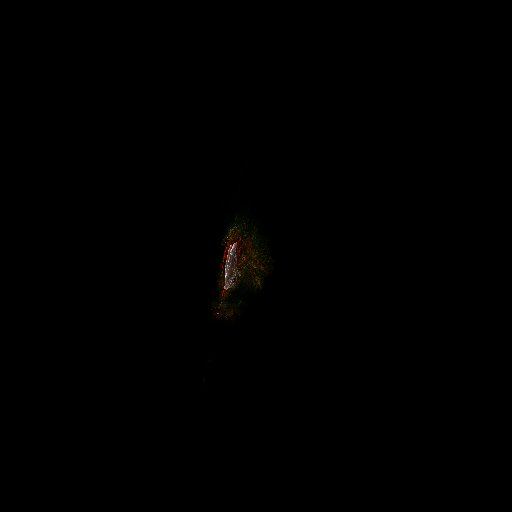

In [16]:
# save the image, flooring especially bright pixels for better contrast
sc.render()
sc.show()

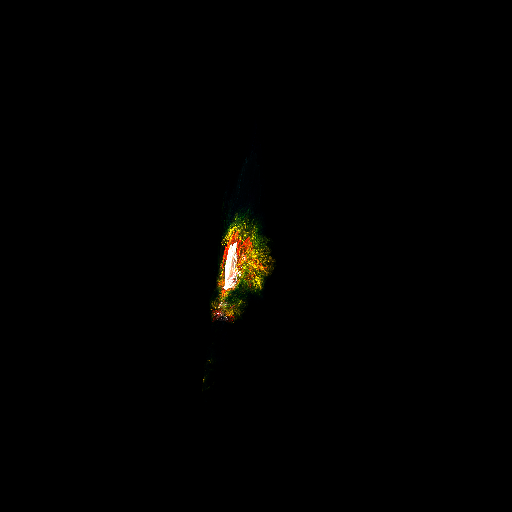

In [17]:
sigma_clip_val = 2
sc.show(sigma_clip=sigma_clip_val)

yt : [INFO     ] 2020-11-18 11:54:00,424 Rendering scene (Can take a while).


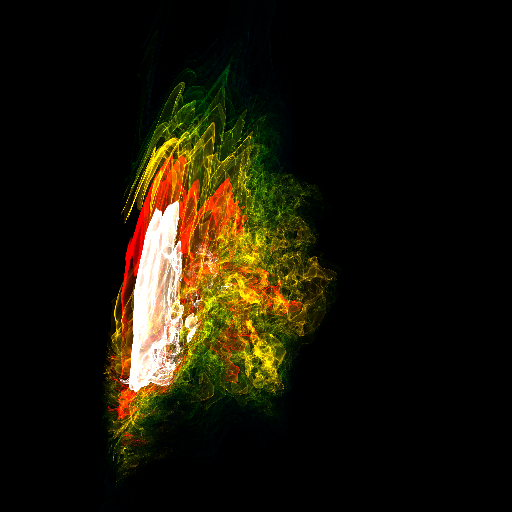

In [18]:
# zoom in a bit 
zoom_factor = 0.25 # < 1 zooms in
init_width = sc.camera.width
sc.camera.width = (init_width * zoom_factor)
sc.render()
sc.show(sigma_clip=sigma_clip_val)

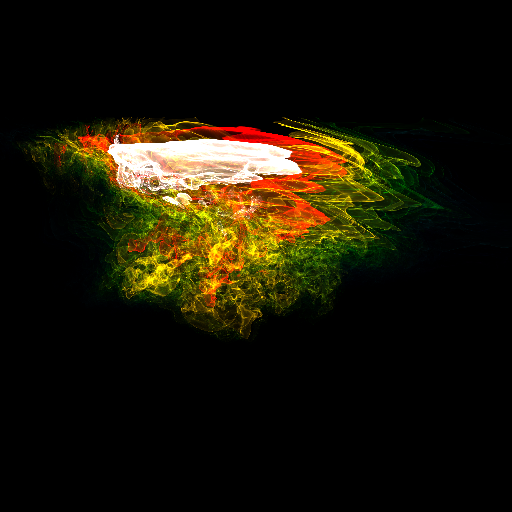

In [19]:
pos = sc.camera.position
sc.camera.set_position(pos, north_vector = [0,0,-1])
sc.render()
sc.show(sigma_clip = sigma_clip_val)

In [22]:
sc.save('figures/cm1_vol_render.png', render = False, sigma_clip = sigma_clip_val)

yt : [INFO     ] 2020-11-18 11:54:33,990 Found previously rendered image to save.
yt : [INFO     ] 2020-11-18 11:54:33,991 Saving rendered image to figures/cm1_vol_render.png
